# 📁 第一步：安裝與載入套件


In [ ]:
!pip install -q torchvision timm

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import timm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# 📁 第二步：下載 Oxford Pets 資料集（貓與狗）

In [2]:
import os, tarfile, shutil
from pathlib import Path
from urllib.request import urlretrieve
import kagglehub
import subprocess

# 🚩 根目錄
root_dir = Path("/content/cat_dog_breeds_dataset")
dog_dir = root_dir / "StanfordDogs"
cat_dir = root_dir / "KaggleCats"
oxford_dir = root_dir / "OxfordIIITPet"
final_dir = root_dir / "all_breeds"

root_dir.mkdir(parents=True, exist_ok=True)

# -----------------------
# 🐶 下載 Stanford Dogs
# -----------------------
print("🔽 Downloading Stanford Dogs...")

dog_images_url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
images_tar = root_dir / "images.tar"
if not images_tar.exists():
    urlretrieve(dog_images_url, images_tar)

    with tarfile.open(images_tar) as tar:
        tar.extractall(path=dog_dir)

    print("✅ Stanford Dogs extracted.")

else:
    print("✅ Stanford Dogs already downloaded.")

# 將 Stanford Dogs 重新整理為格式：breed_name/xxx.jpg
print("🔧 Processing Stanford Dogs...")
raw_dog_img_dir = dog_dir / "Images"
final_dir.mkdir(exist_ok=True)

for breed_folder in raw_dog_img_dir.iterdir():
    breed_name = breed_folder.name.replace("-", "_")
    target_dir = final_dir / breed_name
    target_dir.mkdir(exist_ok=True)

    for i, img_path in enumerate(breed_folder.glob("*.jpg")):
        new_name = f"{breed_name}_{i:04d}.jpg"
        shutil.move(img_path, target_dir / new_name)

print("✅ Stanford Dogs restructured.")

# -----------------------
# 🐱 使用 kagglehub 下載 Kaggle Cat Breeds Dataset
# -----------------------
print("\n🔽 Downloading Kaggle Cat Breeds Dataset via kagglehub...")

kaggle_cat_path = kagglehub.dataset_download("ma7555/cat-breeds-dataset")
print("✅ Kaggle dataset downloaded to:", kaggle_cat_path)

# 轉成 Path 物件
kaggle_cat_path = Path(kaggle_cat_path)

# ✅ 搬到我們的 cat_dir
if not cat_dir.exists():
    cat_dir.mkdir(parents=True, exist_ok=True)
    subprocess.run(["rsync", "-a", f"{kaggle_cat_path}/", f"{cat_dir}/"], check=True)

# 將每個貓品種資料夾移動到 final_dir
print("🔧 Processing Kaggle Cats...")

kaggle_cat_path = Path(kaggle_cat_path)  # 確保是 Path 物件
images_path = kaggle_cat_path / 'images'  # 用 / 自動幫你加斜線

for subdir in images_path.glob("*"):
    if subdir.is_dir():
        breed_name = subdir.name.replace(" ", "_")
        target_dir = final_dir / breed_name
        target_dir.mkdir(exist_ok=True)

        for i, img_path in enumerate(subdir.glob("*")):
            if img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
                new_name = f"{breed_name}_{i:04d}{img_path.suffix.lower()}"
                shutil.move(img_path, target_dir / new_name)

print("✅ Kaggle Cats restructured.")

# -----------------------
# 🐾 加入 Oxford-IIIT Pet Dataset
# -----------------------
print("\n🔽 Downloading Oxford-IIIT Pet Dataset...")
oxford_images_url = "https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz"
oxford_anno_url = "https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz"

oxford_dir.mkdir(exist_ok=True)

# 下載圖片
oxford_img_tar = root_dir / "oxford_images.tar.gz"
if not oxford_img_tar.exists():
    urlretrieve(oxford_images_url, oxford_img_tar)
    with tarfile.open(oxford_img_tar) as tar:
        tar.extractall(path=oxford_dir)
    print("✅ Oxford Pet Images extracted.")
else:
    print("✅ Oxford Pet Images already downloaded.")

# 下載標註（可略過，但你可保留）
oxford_anno_tar = root_dir / "oxford_annotations.tar.gz"
if not oxford_anno_tar.exists():
    urlretrieve(oxford_anno_url, oxford_anno_tar)
    with tarfile.open(oxford_anno_tar) as tar:
        tar.extractall(path=oxford_dir)
    print("✅ Oxford Annotations extracted.")
else:
    print("✅ Oxford Annotations already downloaded.")

# -----------------------
# 🔧 整理 Oxford 資料：breed_name/xxx.jpg
# -----------------------
print("🔧 Processing Oxford-IIIT Pets...")

# Oxford 的命名為：breed_123.jpg，從檔名即可推回品種
oxford_img_dir = oxford_dir / "images"

for img_path in oxford_img_dir.glob("*.jpg"):
    name = img_path.stem  # 沒有副檔名
    breed_name = "_".join(name.lower().split("_")[:-1])  # 去除編號

    target_dir = final_dir / breed_name
    target_dir.mkdir(exist_ok=True)

    new_name = f"{breed_name}_{name[-3:]}.jpg"
    shutil.move(img_path, target_dir / new_name)

print("✅ Oxford Pets restructured.")

# -----------------------
# 📦 總結
# -----------------------
all_classes = sorted([d.name for d in final_dir.iterdir() if d.is_dir()])
print(f"\n📊 總共整合了 {len(all_classes)} 個貓狗品種")
print(f"📁 輸出資料夾：{final_dir}")
print(f"📋 前10種：{all_classes[:30]}")
print(f"📋 全種：{all_classes}")

total_images = sum(len(list((final_dir / class_dir).glob("*"))) for class_dir in all_classes)
print(f"🖼️ 總共圖片數量：{total_images}")

🔽 Downloading Stanford Dogs...
✅ Stanford Dogs extracted.
🔧 Processing Stanford Dogs...
✅ Stanford Dogs restructured.

🔽 Downloading Kaggle Cat Breeds Dataset via kagglehub...


100%|██████████| 1.93G/1.93G [01:32<00:00, 22.3MB/s]

Extracting files...


✅ Kaggle dataset downloaded to: /root/.cache/kagglehub/datasets/ma7555/cat-breeds-dataset/versions/2
🔧 Processing Kaggle Cats...
✅ Kaggle Cats restructured.

🔽 Downloading Oxford-IIIT Pet Dataset...
✅ Oxford Pet Images extracted.
✅ Oxford Annotations extracted.
🔧 Processing Oxford-IIIT Pets...
✅ Oxford Pets restructured.

📊 總共整合了 224 個貓狗品種
📁 輸出資料夾：/content/cat_dog_breeds_dataset/all_breeds
📋 前10種：['Abyssinian', 'American_Bobtail', 'American_Curl', 'American_Shorthair', 'American_Wirehair', 'Applehead_Siamese', 'Balinese', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Burmese', 'Burmilla', 'Calico', 'Canadian_Hairless', 'Chartreux', 'Chausie', 'Chinchilla', 'Cornish_Rex', 'Cymric', 'Devon_Rex', 'Dilute_Calico', 'Dilute_Tortoiseshell', 'Domestic_Long_Hair', 'Domestic_Medium_Hair', 'Domestic_Short_Hair', 'Egyptian_Mau', 'Exotic_Shorthair', 'Extra-Toes_Cat_-_Hemingway_Polydactyl', 'Havana']
📋 全種：['Abyssinian', 'American_Bobtail', 'American_Curl', 'American_Shorthair', 'American_Wireh

In [3]:
from collections import defaultdict

class_image_counts = defaultdict(int)
for class_dir in all_classes:
    image_count = len(list((final_dir / class_dir).glob("*")))
    class_image_counts[class_dir] = image_count

sorted_counts = sorted(class_image_counts.items(), key=lambda x: x[1])
print("📊 最少圖片的前5個類別：", sorted_counts[:5])
print("📊 最多圖片的前5個類別：", sorted_counts[-5:])

📊 最少圖片的前5個類別： [('York_Chocolate', 1), ('Chinchilla', 3), ('Canadian_Hairless', 4), ('Burmilla', 8), ('Cymric', 17)]
📊 最多圖片的前5個類別： [('Persian', 4018), ('Domestic_Long_Hair', 4499), ('American_Shorthair', 5295), ('Domestic_Medium_Hair', 5482), ('Domestic_Short_Hair', 53027)]


In [ ]:
from PIL import Image

for class_dir in all_classes:
    for img_path in (final_dir / class_dir).glob("*"):
        try:
            img = Image.open(img_path)
            img.verify()  # 檢查是否損壞
        except Exception as e:
            print(f"❌ 損壞圖片或非圖片檔案: {img_path}，錯誤訊息：{e}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [4]:
merge_map = {
    # 只保留使用者熟悉或常用名稱
    "Staffordshire Bullterrier": "Staffordshire Bull Terrier",

    "German Short Haired Pointer": "German Shorthaired Pointer",
    "German Shorthaired": "German Shorthaired Pointer",

    # "American Pit Bull Terrier": "Pit Bull",
    # "American Staffordshire Terrier": "Pit Bull",
    # "Boston Bull": "Pit Bull",

    "Malamute": "Alaskan Malamute",

    "Basset Hound": "Basset",
    "English Cocker Spaniel": "Cocker Spaniel",
    "English Springer": "English Springer Spaniel",

    "Toy Poodle": "Poodle",
    "Standard Poodle": "Poodle",
    "Miniature Poodle": "Poodle",

    "Standard Schnauzer": "Schnauzer",
    "Miniature Schnauzer": "Schnauzer",
    "Giant Schnauzer": "Schnauzer",

    "Scotch Terrier": "Scottish Terrier",

    "Sphynx - Hairless Cat": "Sphynx",

    "Bull Mastiff": "Bullmastiff",

    "Leonberg": "Leonberger",

    # 貓的花色合併到「認知上的品種名稱」
    # "Dilute Calico": "Calico",
    # "Dilute Tortoiseshell": "Tortoiseshell",
    # "Torbie": "Domestic Short Hair",
    # "Tiger": "Domestic Short Hair",
    # "Tuxedo": "Domestic Short Hair",
    # "Tabby": "Domestic Short Hair",
    # "Calico": "Domestic Short Hair",
    # "Tortoiseshell": "Domestic Short Hair",

    "Walker Hound": "Treeing Walker Coonhound",

    "Wire Haired Fox Terrier": "Wirehaired Fox Terrier",

    "Toy Terrier": "Toy Fox Terrier",
    "African Hunting Dog": "African Wild Dog",
    "Extra-Toes Cat - Hemingway Polydactyl": "Polydactyl Cat",

    # 縮寫常見問題合併
    "Domestic Longhair": "Domestic Long Hair",
    "Domestic Shorthair": "Domestic Short Hair",
    "Domestic Mediumhair": "Domestic Medium Hair",
}


In [5]:
from pathlib import Path
import re
import shutil

final_dir = root_dir / "all_breeds"          # 原始資料夾，保持不動
final_dir_clean = Path("/content/all_breeds_clean")
final_dir_clean.mkdir(exist_ok=True)

exclude_dirs = {"data", "images"}

def convert_name(name: str) -> str:
    m = re.match(r"n\d+_(.+)", name)
    breed = m.group(1) if m else name
    breed = breed.replace("_", " ").title()
    return merge_map.get(breed, breed)

def safe_merge_folders(src: Path, dst: Path, suffix_conflict=True):
    dst.mkdir(exist_ok=True)
    existing_files = {f.name for f in dst.iterdir() if f.is_file()}

    for img in src.iterdir():
        if img.is_file():
            new_name = img.name
            if new_name in existing_files and suffix_conflict:
                stem, suffix = img.stem, img.suffix
                i = 1
                while f"{stem}_{i}{suffix}" in existing_files:
                    i += 1
                new_name = f"{stem}_{i}{suffix}"
            shutil.copy(img, dst / new_name)
            existing_files.add(new_name)

# 走訪 final_dir 但不修改它，只複製到 final_dir_clean
for folder in final_dir.iterdir():
    if folder.is_dir() and folder.name not in exclude_dirs:
        new_name = convert_name(folder.name)
        target_folder = final_dir_clean / new_name

        if target_folder.exists():
            # 已有同名資料夾，合併內容
            print(f"⚠️ 合併 {folder.name} → {new_name}")
            safe_merge_folders(folder, target_folder)
        else:
            # 複製整個資料夾
            # print(f"➡️ 複製 {folder.name} → {new_name}")
            shutil.copytree(folder, target_folder)

# 印出整理後結果
all_classes = sorted([d.name for d in final_dir_clean.iterdir() if d.is_dir()])
print(f"\n📊 總共整理出 {len(all_classes)} 個品種")
print(f"📁 輸出資料夾：{final_dir_clean}")
print(f"📋 前10種：{all_classes[:10]}")


⚠️ 合併 bombay → Bombay
⚠️ 合併 persian → Persian
⚠️ 合併 n02097209_standard_schnauzer → Schnauzer
⚠️ 合併 Abyssinian → Abyssinian
⚠️ 合併 beagle → Beagle
⚠️ 合併 n02097047_miniature_schnauzer → Schnauzer
⚠️ 合併 n02111129_Leonberg → Leonberger
⚠️ 合併 egyptian_mau → Egyptian Mau
⚠️ 合併 n02108089_boxer → Boxer
⚠️ 合併 samoyed → Samoyed
⚠️ 合併 maine_coon → Maine Coon
⚠️ 合併 n02100735_English_setter → English Setter
⚠️ 合併 scottish_terrier → Scottish Terrier
⚠️ 合併 Sphynx_-_Hairless_Cat → Sphynx
⚠️ 合併 yorkshire_terrier → Yorkshire Terrier
⚠️ 合併 english_cocker_spaniel → Cocker Spaniel
⚠️ 合併 pomeranian → Pomeranian
⚠️ 合併 n02088238_basset → Basset
⚠️ 合併 n02100236_German_short_haired_pointer → German Shorthaired Pointer
⚠️ 合併 Russian_Blue → Russian Blue
⚠️ 合併 n02113624_toy_poodle → Poodle
⚠️ 合併 bengal → Bengal
⚠️ 合併 Birman → Birman
⚠️ 合併 keeshond → Keeshond
⚠️ 合併 staffordshire_bull_terrier → Staffordshire Bull Terrier
⚠️ 合併 british_shorthair → British Shorthair
⚠️ 合併 n02109525_Saint_Bernard → Saint Bernard
⚠️ 合併 n

In [6]:
class_image_counts = {
    cls: len(list((final_dir_clean / cls).glob("*")))
    for cls in all_classes
}

sorted_counts = sorted(class_image_counts.items(), key=lambda x: x[1])
print("📊 最少圖片的前5個類別：", sorted_counts[:5])
print("📊 最多圖片的前5個類別：", sorted_counts[-5:])

📊 最少圖片的前5個類別： [('York Chocolate', 1), ('Chinchilla', 3), ('Canadian Hairless', 4), ('Burmilla', 8), ('Cymric', 17)]
📊 最多圖片的前5個類別： [('Persian', 4218), ('Domestic Long Hair', 4499), ('American Shorthair', 5295), ('Domestic Medium Hair', 5482), ('Domestic Short Hair', 53027)]


In [ ]:
import random
from shutil import copy2
from pathlib import Path
from collections import defaultdict

min_images = 150
max_images = 250

target_dir = Path("/content/balanced_datasets")
target_dir.mkdir(parents=True, exist_ok=True)

all_classes = sorted([d.name for d in final_dir_clean.iterdir() if d.is_dir()])

for cls in all_classes:
    class_path = final_dir_clean / cls
    images = list(class_path.glob("*"))

    # print(f"{cls}: 原始圖片數量 {len(images)}")

    if len(images) < min_images:
        print(f"跳過 {cls} (圖片不足)")
        continue

    selected_images = (
        random.sample(images, max_images) if len(images) > max_images else images
    )

    out_class_dir = target_dir / cls
    out_class_dir.mkdir(parents=True, exist_ok=True)

    for img in selected_images:
        try:
            copy2(img, out_class_dir)
        except Exception as e:
            print(f"⚠️ 複製 {img} 失敗: {e}")

# 只統計有複製過的資料夾
copied_classes = [d for d in target_dir.iterdir() if d.is_dir()]

class_image_counts = {
    d.name: len(list(d.glob("*"))) for d in copied_classes
}

sorted_counts = sorted(class_image_counts.items(), key=lambda x: x[1])

print("📊 最少圖片的前5個類別：", sorted_counts[:5])
print("📊 最多圖片的前5個類別：", sorted_counts[-5:])


跳過 American Curl (圖片不足)
跳過 American Wirehair (圖片不足)
跳過 Applehead Siamese (圖片不足)
跳過 Burmilla (圖片不足)
跳過 Canadian Hairless (圖片不足)
跳過 Chartreux (圖片不足)
跳過 Chausie (圖片不足)
跳過 Chinchilla (圖片不足)
跳過 Cymric (圖片不足)
跳過 Devon Rex (圖片不足)
跳過 Japanese Bobtail (圖片不足)
跳過 Javanese (圖片不足)
跳過 Korat (圖片不足)
跳過 Laperm (圖片不足)
跳過 Nebelung (圖片不足)
跳過 Ocicat (圖片不足)
跳過 Oriental Long Hair (圖片不足)
跳過 Oriental Tabby (圖片不足)
跳過 Pekinese (圖片不足)
跳過 Pixiebob (圖片不足)
跳過 Ragamuffin (圖片不足)
跳過 Redbone (圖片不足)
跳過 Selkirk Rex (圖片不足)
跳過 Silver (圖片不足)
跳過 Singapura (圖片不足)
跳過 Somali (圖片不足)
跳過 York Chocolate (圖片不足)
📊 最少圖片的前5個類別： [('Irish Water Spaniel', 150), ('Eskimo Dog', 150), ('Affenpinscher', 150), ('Groenendael', 150), ('Border Collie', 150)]
📊 最多圖片的前5個類別： [('Scottish Terrier', 250), ('Balinese', 250), ('Siamese', 250), ('Russian Blue', 250), ('Tonkinese', 250)]


In [8]:
from pathlib import Path

target_dir = Path("/content/balanced_datasets")

# 品種資料夾列表（只取資料夾）
breed_dirs = [d for d in target_dir.iterdir() if d.is_dir()]

print(f"🐾 總共有 {len(breed_dirs)} 個品種")

breed_image_counts = {}
for breed_dir in breed_dirs:
    images = list(breed_dir.glob("*"))
    breed_image_counts[breed_dir.name] = len(images)

# 顯示每個品種的圖片數量
# for breed, count in sorted(breed_image_counts.items()):
#     print(f"{breed}: {count} 張圖片")

# 如果想要總圖片數
total_images = sum(breed_image_counts.values())
print(f"📸 總共 {total_images} 張圖片")


🐾 總共有 162 個品種
📸 總共 32636 張圖片


# 📁 第三步：資料切分 & 載入器（DataLoader）

In [9]:
dataset = datasets.ImageFolder(
    root=target_dir,
)
print(f"✅ 品種數量：{len(dataset.classes)}")
print(f"📋 前10種：{dataset.classes[:10]}")
print(dataset.class_to_idx)  # 品種名 → 數字 label 對應

✅ 品種數量：162
📋 前10種：['Abyssinian', 'Affenpinscher', 'Afghan Hound', 'African Wild Dog', 'Airedale', 'Alaskan Malamute', 'American Bobtail', 'American Bulldog', 'American Pit Bull Terrier', 'American Shorthair']
{'Abyssinian': 0, 'Affenpinscher': 1, 'Afghan Hound': 2, 'African Wild Dog': 3, 'Airedale': 4, 'Alaskan Malamute': 5, 'American Bobtail': 6, 'American Bulldog': 7, 'American Pit Bull Terrier': 8, 'American Shorthair': 9, 'American Staffordshire Terrier': 10, 'Appenzeller': 11, 'Australian Terrier': 12, 'Balinese': 13, 'Basenji': 14, 'Basset': 15, 'Beagle': 16, 'Bedlington Terrier': 17, 'Bengal': 18, 'Bernese Mountain Dog': 19, 'Birman': 20, 'Black And Tan Coonhound': 21, 'Blenheim Spaniel': 22, 'Bloodhound': 23, 'Bluetick': 24, 'Bombay': 25, 'Border Collie': 26, 'Border Terrier': 27, 'Borzoi': 28, 'Boston Bull': 29, 'Bouvier Des Flandres': 30, 'Boxer': 31, 'Brabancon Griffon': 32, 'Briard': 33, 'British Shorthair': 34, 'Brittany Spaniel': 35, 'Bullmastiff': 36, 'Burmese': 37, 'Cai

這版保留你原本的架構，加入一些增強視角變化與遮擋能力：

In [10]:
# 定義 transforms
import torchvision.transforms as transforms
import random

train_transform = transforms.Compose([
    transforms.Resize(330),  # 先縮放，避免 RandomResizedCrop 過度裁切主體
    transforms.RandomResizedCrop(300, scale=(0.8, 1.0)),  # 隨機裁切比例限制在 80~100%，避免裁掉整隻貓
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),     # 平移
        scale=(0.9, 1.1),         # 縮放
        shear=10                  # 剪切
    ),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    # transforms.Lambda(lambda img: random_erasing(img, p=0.3)),  # 自定義簡易遮擋
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.2), ratio=(0.3, 3.3), value='random')
])


val_transform = transforms.Compose([
    transforms.Resize(330),
    transforms.CenterCrop(300), # resnet為224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [11]:
# 固定隨機種子來切分 train/val
generator = torch.Generator().manual_seed(39)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_indices, val_indices = torch.utils.data.random_split(range(len(dataset)), [train_size, val_size], generator=generator)

In [12]:
# 自定義 Subset 類別以支援不同 transform
class TransformSubset(Dataset):
    def __init__(self, dataset, indices, transform):
        self.dataset = dataset
        self.indices = indices
        self.transform = transform

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image, label = self.dataset[self.indices[idx]]
        if self.transform:
            image = self.transform(image)
        return image, label


In [13]:
# 應用 transforms
train_dataset = TransformSubset(dataset, train_indices.indices, train_transform)
val_dataset = TransformSubset(dataset, val_indices.indices, val_transform)

# 若已經建立過 train_loader 和 val_loader，就先刪除它們
try:
    del train_loader
    del val_loader
except NameError:
    pass  # 如果變數還不存在，就略過錯誤

# 建立 DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2, pin_memory=True)

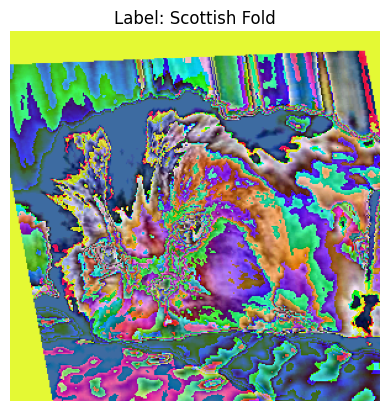

In [14]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# 取一筆資料（image 是 Tensor, label 是 int）
image, label = train_dataset[0]
predicted_breed = dataset.classes[label]

# 如果圖像是 Tensor，要轉回 PIL 或 numpy 才能顯示
if isinstance(image, torch.Tensor):
    image = F.to_pil_image(image)  # 轉為 PIL 圖片

# 顯示圖片和標籤
plt.imshow(image)
plt.title(f"Label: {predicted_breed}")
plt.axis('off')
plt.show()

# 📁 第四步：使用預訓練CNN模型（ResNet18）進行微調

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
import torch
torch.cuda.empty_cache()

In [16]:
# Try to get torchinfo, install it if it doesn't work
try:
  from torchinfo import summary
except:
  print("[INFO] Couldn't find torchinfo... installing it.")
  !pip install -q torchinfo
  from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 載入預訓練 EfficientNet-B3
model = models.efficientnet_b3(pretrained=True).to(device)

# 先凍結所有特徵層（features）
for param in model.features.parameters():
    param.requires_grad = False

# 讓分類器 (classifier) 層可訓練
for param in model.classifier.parameters():
    param.requires_grad = True

# 例如解凍最後3個blocks (以 features[-3], features[-2], features[-1] 為例)
for layer in model.features[-9:]:
    for param in layer.parameters():
        param.requires_grad = True


# 查看目前可訓練參數數量（確認）
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable parameters: {trainable_params}")

# 確認模型結構與凍結狀況
from torchinfo import summary
summary(model=model,
        input_size=(8, 3, 300, 300),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 103MB/s]


Trainable parameters: 12233232


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [8, 3, 300, 300]     [8, 1000]            --                   True
├─Sequential (features)                                      [8, 3, 300, 300]     [8, 1536, 10, 10]    --                   True
│    └─Conv2dNormActivation (0)                              [8, 3, 300, 300]     [8, 40, 150, 150]    --                   True
│    │    └─Conv2d (0)                                       [8, 3, 300, 300]     [8, 40, 150, 150]    1,080                True
│    │    └─BatchNorm2d (1)                                  [8, 40, 150, 150]    [8, 40, 150, 150]    80                   True
│    │    └─SiLU (2)                                         [8, 40, 150, 150]    [8, 40, 150, 150]    --                   --
│    └─Sequential (1)                                        [8, 40, 150, 150]    [8, 24, 150,

In [ ]:
import torch.nn as nn

# ✅ 建議寫法（通用，防呆）：
num_classes = len(dataset.classes)

if hasattr(model, 'fc'):
    model.fc = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(model.fc.in_features, num_classes)
    )
elif hasattr(model, 'classifier'):
    if isinstance(model.classifier, nn.Sequential):
        # EfficientNet 之類的
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, num_classes)
    else:
        # 有些模型 classifier 是單層
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, num_classes)
elif hasattr(model, 'heads'):
    model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)

model = model.to(device)

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
    input_size=(8, 3, 300, 300), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
    verbose=0,
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
)

# 📁 第五步：訓練模型

In [ ]:
import torch.nn as nn
import torch.optim as optim

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 快速：從原始 dataset 取 label，避開 transform
targets = [dataset[i][1] for i in train_indices.indices]
# 假設 targets 是你所有的類別標籤 list
class_weights = compute_class_weight('balanced', classes=np.unique(targets), y=targets)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

# 先收集分類器和解凍的 features 層參數
classifier_params = list(model.classifier.parameters())
fine_tune_params = []
for layer in model.features[-3:]:
    fine_tune_params += list(layer.parameters())

# 其餘層凍結，不加入 optimizer
optimizer = optim.AdamW([
    {'params': classifier_params, 'lr': 3e-3},       # 分類器層較大 lr
    {'params': fine_tune_params, 'lr': 1e-3}         # 微調層較小 lr
], weight_decay=1e-4)


torch.manual_seed(42)

In [22]:
from tqdm.auto import tqdm
import torch

# 假設你已經有這些變數：
# model, train_loader, val_loader, device, optimizer, criterion

best_acc = 0.0
patience = 5  # Early stopping 容忍幾輪驗證損失沒改善
trigger_times = 0

# 建立學習率調整器，根據驗證損失調整學習率
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

scaler = torch.amp.GradScaler(device='cuda')

start_epoch = 0
best_acc = 0.0

if os.path.exists("checkpoint_all.pth"):
    checkpoint = torch.load("checkpoint_all.pth")
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scaler.load_state_dict(checkpoint['scaler_state_dict'])
    start_epoch = checkpoint['epoch']
    best_acc = checkpoint.get('best_acc', 0.0)
    print(f"📂 重新載入模型，從第 {start_epoch} 輪繼續訓練，歷史最佳 acc = {best_acc:.4f}")
else:
    print("🆕 沒有找到 checkpoint，從頭開始訓練")


for epoch in range(start_epoch, 20):  # 你可以自己調整最大訓練輪數
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc=f"[訓練 Epoch {epoch+1}]"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        with torch.amp.autocast(device_type='cuda'):
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"\n📘 Epoch {epoch+1} 結果:")
    print(f"🧠 訓練損失: {avg_train_loss:.4f}")
    print(f"✅ 驗證損失: {avg_val_loss:.4f}")
    print(f"🎯 驗證準確率: {val_acc:.4f}")

    # 更新學習率調整器
    scheduler.step(avg_val_loss)
    # 印出當前學習率（建議方式）
    current_lr = scheduler.optimizer.param_groups[0]['lr']
    print(f"📉 當前學習率: {current_lr:.6f}")

    # 儲存最佳模型
    if val_acc >= best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        print("💾 儲存最佳模型 ✅")
        trigger_times = 0  # 驗證有改善，重置早停計數
    else:
        torch.save(model.state_dict(), "model.pth")
        print("💾 儲存最新模型 ✅")
        trigger_times += 1
        print(f"⚠️ Early stopping 計數: {trigger_times}/{patience}")

    # Early stopping 判斷
    if trigger_times >= patience:
        print(f"⏳ 早停條件達成，訓練提前結束於第 {epoch+1} 輪")
        break

print(f"\n🎉 訓練完成！最佳驗證準確率: {best_acc:.4f}")


📂 重新載入模型，從第 13 輪繼續訓練，歷史最佳 acc = 0.7969


[訓練 Epoch 14]:   0%|          | 0/3264 [00:00<?, ?it/s]


📘 Epoch 14 結果:
🧠 訓練損失: 1.7114
✅ 驗證損失: 1.5532
🎯 驗證準確率: 0.7791
📉 當前學習率: 0.000070
💾 儲存最新模型 ✅
⚠️ Early stopping 計數: 1/5


[訓練 Epoch 15]:   0%|          | 0/3264 [00:00<?, ?it/s]


📘 Epoch 15 結果:
🧠 訓練損失: 1.6737
✅ 驗證損失: 1.5583
🎯 驗證準確率: 0.7817
📉 當前學習率: 0.000070
💾 儲存最新模型 ✅
⚠️ Early stopping 計數: 2/5


[訓練 Epoch 16]:   0%|          | 0/3264 [00:00<?, ?it/s]


📘 Epoch 16 結果:
🧠 訓練損失: 1.6414
✅ 驗證損失: 1.5718
🎯 驗證準確率: 0.7733
📉 當前學習率: 0.000070
💾 儲存最新模型 ✅
⚠️ Early stopping 計數: 3/5


[訓練 Epoch 17]:   0%|          | 0/3264 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b458c2c87c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
        Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7b458c2c87c0>
 Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
^    ^self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    ^^if w.is_alive():
^ ^ ^^^  ^  ^^ ^^^^^^^^^^^^^


📘 Epoch 17 結果:
🧠 訓練損失: 1.6136
✅ 驗證損失: 1.5712
🎯 驗證準確率: 0.7790
📉 當前學習率: 0.000035
💾 儲存最新模型 ✅
⚠️ Early stopping 計數: 4/5


[訓練 Epoch 18]:   0%|          | 0/3264 [00:00<?, ?it/s]


📘 Epoch 18 結果:
🧠 訓練損失: 1.5819
✅ 驗證損失: 1.5595
🎯 驗證準確率: 0.7808
📉 當前學習率: 0.000035
💾 儲存最新模型 ✅
⚠️ Early stopping 計數: 5/5
⏳ 早停條件達成，訓練提前結束於第 18 輪

🎉 訓練完成！最佳驗證準確率: 0.7969


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 印出 Confusion Matrix 和報告
cm = confusion_matrix(all_labels, all_preds)
print("📉 Confusion Matrix:")
print(cm)

report = classification_report(all_labels, all_preds, digits=4)
print("📊 Classification Report:")
print(report)
# 加上 labels 和 class_names
report = classification_report(
    all_labels,
    all_preds,
    target_names=dataset.class_to_idx,  # e.g. from dataset.class_to_idx
    digits=4
)


📉 Confusion Matrix:
[[37  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  1  0 ...  0  0 46]]
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.6607    0.7872    0.7184        47
           1     0.9200    0.8846    0.9020        26
           2     0.9808    1.0000    0.9903        51
           3     1.0000    1.0000    1.0000        44
           4     0.9767    0.9767    0.9767        43
           5     0.7674    0.9429    0.8462        35
           6     0.3750    0.0612    0.1053        49
           7     0.8627    0.9167    0.8889        48
           8     0.8462    0.5500    0.6667        40
           9     0.0000    0.0000    0.0000        51
          10     0.6750    0.7500    0.7105        36
          11     0.8462    0.9167    0.8800        36
          12     0.9268    0.8444    0.8837        45
          13     0.3571    0.4255    0.388

In [24]:
# 儲存完整 checkpoint（包含模型、optimizer、epoch 等）
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scaler_state_dict': scaler.state_dict(),  # 混合精度
    'best_acc': best_acc
}, "checkpoint_all.pth")


# 📁 第六步：收集「被錯誤辨識為狗」的貓

In [27]:
cat_breeds = [
    "Abyssinian",
    "American Shorthair",
    "Balinese",
    "Bengal",
    "Birman",
    "Bombay",
    "British Shorthair",
    "Burmese",
    "Calico",
    "Cornish Rex",
    "Dilute Calico",
    "Dilute Tortoiseshell",
    "Domestic Long Hair",
    "Domestic Medium Hair",
    "Domestic Short Hair",
    "Egyptian Mau",
    "Exotic Shorthair",
    "Havana",
    "Himalayan",
    "Maine Coon",
    "Manx",
    "Mexican Hairless",
    "Munchkin",
    "Norwegian Forest Cat",
    "Oriental Short Hair",
    "Persian",
    "Polydactyl Cat",
    "Ragdoll",
    "Russian Blue",
    "Scottish Fold",
    "Siamese",
    "Snowshoe",
    "Sphynx",
    "Tabby",
    "Tiger",
    "Tonkinese",
    "Torbie",
    "Tortoiseshell",
    "Turkish Angora",
    "Turkish Van",
]

In [63]:
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

model.eval()
misclassified_cats = defaultdict(list)

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        topk_vals, topk_idxs = torch.topk(outputs, k=3, dim=1)  # 取前3名
        for i in range(len(images)):
            true_class = dataset.classes[labels[i].item()]
            top3_classes = [dataset.classes[idx.item()] for idx in topk_idxs[i]]
            is_true_cat = true_class in cat_breeds
            top3_has_cat = any(c in cat_breeds for c in top3_classes)

            if is_true_cat and not top3_has_cat:
                # 真的是貓，預測前3都不是貓 => 真正的貓變狗
                misclassified_cats[true_class].append((images[i].cpu(), top3_classes))


🐱 真實類別: Sphynx 被誤判為（Top‑3 都是狗）:
  🔺 Top3: ['Borzoi', 'Collie', 'Shetland Sheepdog']


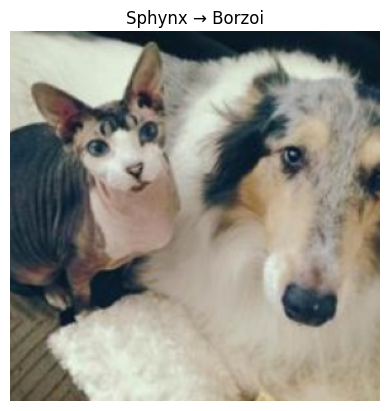

In [64]:
def unnormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return img_tensor * std + mean

for true_cat in misclassified_cats:
    print(f"\n🐱 真實類別: {true_cat} 被誤判為（Top‑3 都是狗）:")
    shown = 0
    for img, top3 in misclassified_cats[true_cat]:
        print(f"  🔺 Top3: {top3}")
        plt.imshow(np.transpose(unnormalize(img).numpy(), (1, 2, 0)))
        plt.title(f"{true_cat} → {top3[0]}")
        plt.axis("off")
        plt.show()
        shown += 1
        if shown >= 2:
            break


In [65]:
# 依照誤判數排序
misclassified_count = {k: len(v) for k, v in misclassified_cats.items()}
sorted_misclassified = sorted(misclassified_count.items(), key=lambda x: x[1], reverse=True)

print("🔢 誤判為狗最多的前幾名貓品種：")
for i, (breed, count) in enumerate(sorted_misclassified[:5]):
    print(f"{i+1}. {breed}：{count} 次")


🔢 誤判為狗最多的前幾名貓品種：
1. Sphynx：1 次


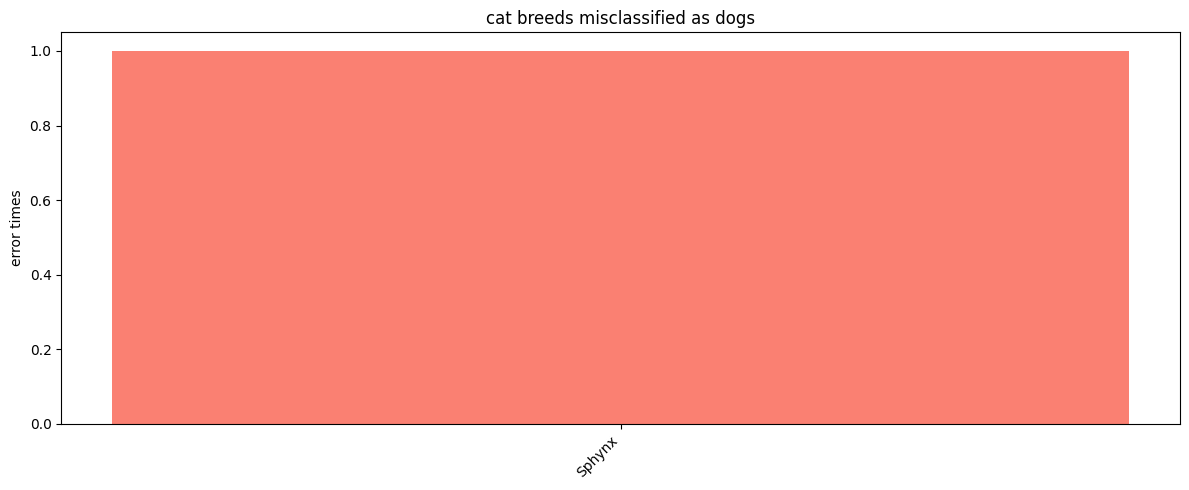

In [66]:
import matplotlib.pyplot as plt

labels = [item[0] for item in sorted_misclassified]
counts = [item[1] for item in sorted_misclassified]

plt.figure(figsize=(12, 5))
plt.bar(labels, counts, color='salmon')
plt.title("cat breeds misclassified as dogs")
plt.ylabel("error times")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:
import torch
import os
import csv
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 📁 建立資料夾
os.makedirs("stats", exist_ok=True)

# 🧠 模型進入驗證模式
model.eval()

# 📦 統計誤判資料
misclassified_counts = Counter()
total_cat_counts = Counter()
examples = defaultdict(list)

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        topk_vals, topk_idxs = torch.topk(outputs, k=3, dim=1)

        for i in range(len(images)):
            true_class = dataset.classes[labels[i].item()]
            top3_classes = [dataset.classes[idx.item()] for idx in topk_idxs[i]]

            if true_class in cat_breeds:
                total_cat_counts[true_class] += 1
                if all(pred not in cat_breeds for pred in top3_classes):
                    misclassified_counts[true_class] += 1
                    examples[true_class].append((images[i].cpu(), top3_classes))

# 🧾 存成 CSV
csv_path = "stats/misclassified_summary.csv"
with open(csv_path, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Cat Breed", "# Images", "# Misclassified (Top‑3 all dogs)", "Misclassification Rate"])
    for breed in sorted(total_cat_counts.keys()):
        total = total_cat_counts[breed]
        wrong = misclassified_counts.get(breed, 0)
        rate = wrong / total if total > 0 else 0
        writer.writerow([breed, total, wrong, f"{rate:.4f}"])

print(f"✅ 儲存完成：{csv_path}")


✅ 儲存完成：stats/misclassified_summary.csv


# 統計

✅ 條狀圖儲存於：stats/charts.png


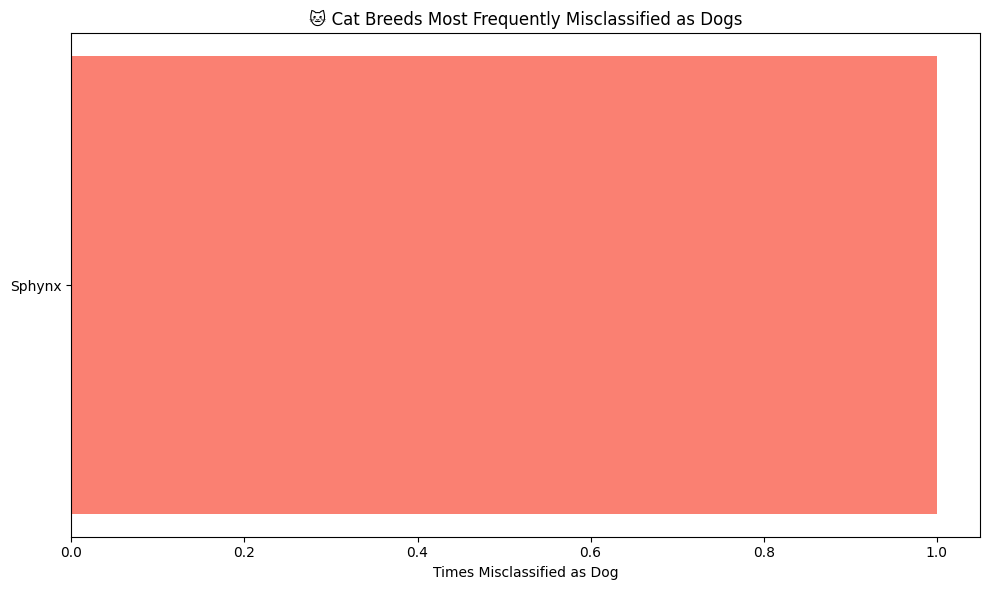

In [69]:
# 🧮 匯入 CSV
df = pd.read_csv("stats/misclassified_summary.csv")

# 🔍 篩選誤判次數 > 0 的
df_filtered = df[df["# Misclassified (Top‑3 all dogs)"] > 0].copy()
df_filtered.sort_values(by="# Misclassified (Top‑3 all dogs)", ascending=False, inplace=True)

# 📊 條狀圖
plt.figure(figsize=(10, 6))
plt.barh(df_filtered["Cat Breed"], df_filtered["# Misclassified (Top‑3 all dogs)"], color='salmon')
plt.xlabel("Times Misclassified as Dog")
plt.title("🐱 Cat Breeds Most Frequently Misclassified as Dogs")
plt.gca().invert_yaxis()
plt.tight_layout()

# 💾 儲存圖片
plot_path = "stats/charts.png"
plt.savefig(plot_path)
print(f"✅ 條狀圖儲存於：{plot_path}")
plt.show()


In [70]:
print(f"📦 圖片總數：{len(dataset)}")


📦 圖片總數：32636


In [71]:
print("\n🔢 各貓品種統計（含實際圖片數量）:")
print(f"{'貓品種':<20} {'總圖數':>6} {'誤判次數':>8} {'誤判率':>10}")
print("-" * 45)

for breed in sorted(total_cat_counts.keys()):
    total = total_cat_counts[breed]
    wrong = misclassified_counts.get(breed, 0)
    rate = wrong / total if total > 0 else 0
    print(f"{breed:<20} {total:>6} {wrong:>8} {rate:>9.2%}")



🔢 各貓品種統計（含實際圖片數量）:
貓品種                     總圖數     誤判次數        誤判率
---------------------------------------------
Abyssinian               47        0     0.00%
American Shorthair       51        0     0.00%
Balinese                 47        0     0.00%
Bengal                   45        0     0.00%
Birman                   58        0     0.00%
Bombay                   48        0     0.00%
British Shorthair        52        0     0.00%
Burmese                  46        0     0.00%
Calico                   51        0     0.00%
Cornish Rex              28        0     0.00%
Dilute Calico            53        0     0.00%
Dilute Tortoiseshell     54        0     0.00%
Domestic Long Hair       48        0     0.00%
Domestic Medium Hair     45        0     0.00%
Domestic Short Hair      45        0     0.00%
Egyptian Mau             56        0     0.00%
Exotic Shorthair         36        0     0.00%
Havana                   35        0     0.00%
Himalayan                59        0    